Author - Aanshika Verma <br>
Topic - Cardiovascular Disease Risk Predictor <br>
Model used - Logistic Regression , KNN , Random Forest , XGBoost

Importing Libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

Data Collection and Preprocessing

In [237]:
#loading data
data = pd.read_csv('/content/heart.csv')

In [238]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [239]:
data.shape

(1025, 14)

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [241]:
#checking missing values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [242]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data cleaning

In [243]:
# replacing values for logistic regression algorithm
#data['target']=data['target'].replace(['Absence','Presence'],[0,1])

In [244]:
data['target'].unique()

array([0, 1])

In [245]:
data['target'].value_counts(normalize=True)

,proportion
target,
1,0.513171
0,0.486829


In [246]:
data['target'].value_counts()

,count
target,
1,526
0,499


Splitting data --> Target, other clinical attribute

In [247]:
#feature Extraction
X = data.drop('target', axis=1)
y = data['target']

In [248]:
print(X)
print(y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [249]:
#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [250]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [251]:
#creating preprocessing pipline
preprocessor = Pipeline([('scaler', StandardScaler())])

Training and Evaluating models <br>
--> LR <br>
--> KNN <br>
--> Random Forest

In [252]:
#Defining models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000 , random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}



--- Logistic Regression ---
Accuracy: 0.8098
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



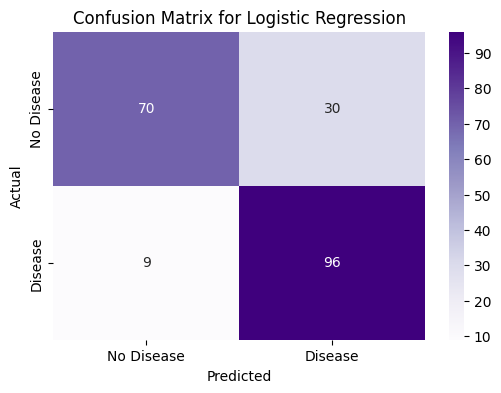


--- K-Nearest Neighbors ---
Accuracy: 0.8634
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.86      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



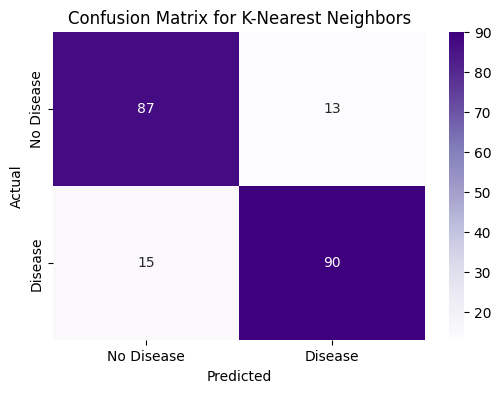


--- Random Forest ---
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



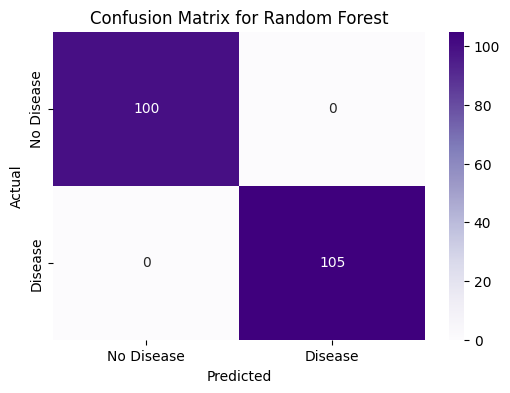

In [253]:
results={}

for name, model in models.items():
    # Create a full pipeline with preprocessing and the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    #training models
    pipeline.fit(X_train, y_train)

    #prediction
    y_pred = pipeline.predict(X_test)

    #evaluation and accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    #print results
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Hyperparameter Tuning

In [ ]:
# --- Random Forest Tuning ---
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Define a smaller, faster parameter grid for demonstration
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

#Tuning Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", grid_search_rf.best_params_)
tuned_rf_accuracy = grid_search_rf.best_score_

results['Tuned Random Forest'] = tuned_rf_accuracy
print(f"Best Cross-validation Accuracy: {tuned_rf_accuracy:.4f}")

y_pred_rf_tuned = grid_search_rf.predict(X_test)
print("Tuned Random Forest Test Set Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
#comparision Plot
results_data = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_data = results_data.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=results_data, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')

plt.xlim(0.8, 1.0)
for index, value in enumerate(results_data['Accuracy']):
    plt.text(value, index, f' {value:.4f}', va='center')

plt.show()
print(results_data)